In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Dados/unified-data/full_table.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,municipio,cod_municipality,regiao_intermediaria,cod_regiao_intermediaria,cod_regiao_imediata,regiao_imediata,tipo_producao,cod_variavel,variavel,produto,valor,ano
0,Abaetetuba,1500107,Abaetetuba,150003,1501,Belém,Pecuária,105.0,Efetivo dos rebanhos,Bovino,28,1974.0
1,Abaetetuba,1500107,Abaetetuba,150003,1501,Belém,Pecuária,105.0,Efetivo dos rebanhos,Bovino,54,1975.0
2,Abaetetuba,1500107,Abaetetuba,150003,1501,Belém,Pecuária,105.0,Efetivo dos rebanhos,Bovino,47,1976.0
3,Abaetetuba,1500107,Abaetetuba,150003,1501,Belém,Pecuária,105.0,Efetivo dos rebanhos,Bovino,39,1977.0
4,Abaetetuba,1500107,Abaetetuba,150003,1501,Belém,Pecuária,105.0,Efetivo dos rebanhos,Bovino,10,1978.0


In [4]:
df[['tipo_producao']]

,tipo_producao
0,Pecuária
1,Pecuária
2,Pecuária
3,Pecuária
4,Pecuária
...,...
731530,Produto das lavouras temporárias
731531,Área de cobertura de Floresta
731532,Pastagem
731533,Produto das lavouras temporárias


In [5]:
df.produto = df.produto.replace({'1.2.1 - Lenha de eucalipto':'Lenha de eucalipto',
                    '1.3.1.1 - Madeira em tora de eucalipto para papel e celulose':'Madeira em tora de eucalipto para papel e celulose',
                    '1.3.2.1 - Madeira em tora de eucalipto para outras finalidades':'Madeira em tora de eucalipto para outras finalidades',
                    '1.3.2.3 - Madeira em tora de outras espécies para outras finalidades':'Madeira em tora de outras espécies para outras finalidades',
                    '1.1.1 - Carvão vegetal de eucalipto':'Carvão vegetal de eucalipto'})

In [6]:
for i in df.variavel.unique():
  print(i)


Efetivo dos rebanhos
Quantidade produzida
Área plantada
Área colhida
Área destinada à colheita
Quantidade produzida na silvicultura
nan
Área de cobertura


In [7]:
for i in df.produto.unique():
  print(i)

Bovino
Bubalino
Equino
Caprino
Ovino
Abacaxi*
Amendoim (em casca)
Arroz (em casca)
Batata-doce
Cana-de-açúcar
Cebola
Feijão (em grão)
Fumo (em folha)
Malva (fibra)
Melancia
Milho (em grão)
Soja (em grão)
Sorgo (em grão)
Tomate
Açaí
Banana (cacho)
Borracha (látex coagulado)
Cacau (em amêndoa)
Café (em grão) Total
Café (em grão) Arábica
Castanha de caju
Coco-da-baía*
Goiaba
Laranja
Limão
Mamão
Maracujá
Palmito
Pimenta-do-reino
Tangerina
Urucum (semente)
Carvão vegetal de eucalipto
Lenha de eucalipto
Madeira em tora de eucalipto para papel e celulose
Madeira em tora de eucalipto para outras finalidades
Madeira em tora de outras espécies para outras finalidades
nan
Florest
Pasto
Outros


In [8]:
for i in df.tipo_producao.unique():
  print(i)

Pecuária
Produto das lavouras temporárias
Produto das lavouras permanentes
Silvicultura
nan
Área de cobertura de Floresta
Pastagem


In [9]:
df.columns

Index(['municipio', 'cod_municipality', 'regiao_intermediaria',
       'cod_regiao_intermediaria', 'cod_regiao_imediata', 'regiao_imediata',
       'tipo_producao', 'cod_variavel', 'variavel', 'produto', 'valor', 'ano'],
      dtype='object')

In [14]:
df = df.reset_index(drop=True)
df = df.replace('...', 0)
df = df.replace('-', 0)
df = df.replace('--', 0)
df = df.replace('......', 0)
df['valor'] = df['valor'].astype('float64')

In [15]:
df[df['produto'] == 'Soja (em grão)']['variavel'].unique()

array(['Quantidade produzida', 'Área plantada', 'Área colhida',
       'Área de cobertura'], dtype=object)

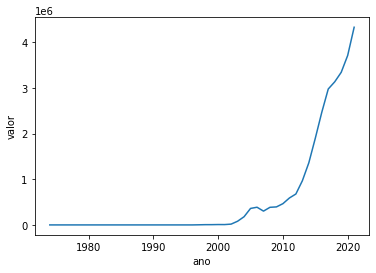

In [16]:
sns.lineplot(data = df[df['produto'] == 'Soja (em grão)'][['valor', 'ano']].groupby('ano').sum(), y = 'valor', x = 'ano')

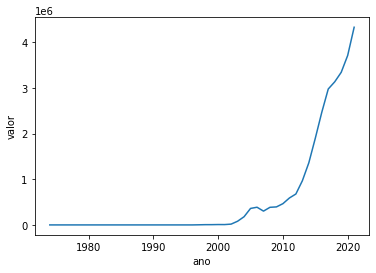

In [ ]:
sns.lineplot(data = df[df['produto'] == 'Soja (em grão)'][['valor', 'ano', 'produto']].groupby('ano').sum(), y = 'valor', x = 'ano')

In [ ]:
df[(df['variavel'] == 'Quantidade produzida') & (df['produto'] == 'Soja (em grão)') & (df['regiao_imediata'] == 'Castanhal')][['valor', 'ano', 'regiao_intermediaria']].groupby(['ano', 'regiao_intermediaria']).sum()

valor
ano    regiao_intermediaria           
1974.0 Bragança                    0.0
       Capanema                    0.0
       Capitão Poço                0.0
       Castanhal                   0.0
       Paragominas                 0.0
...                                ...
2021.0 Bragança                    0.0
       Capanema                    0.0
       Capitão Poço                0.0
       Castanhal                   0.0
       Paragominas           1078106.0

[240 rows x 1 columns]

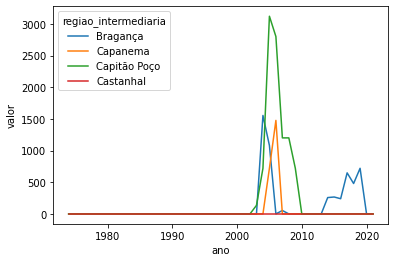

In [ ]:
sns.lineplot(data = df[(df['variavel'] == 'Quantidade produzida') & (df['produto'] == 'Soja (em grão)') & (df['regiao_imediata'] == 'Castanhal') & (df['regiao_intermediaria'] != 'Paragominas')][['valor', 'ano', 'regiao_intermediaria']].groupby(['ano', 'regiao_intermediaria']).sum(), y = 'valor', x = 'ano', hue= 'regiao_intermediaria')


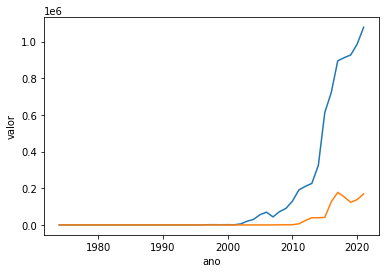

In [ ]:
                                                                                                      # Intermediaria
sns.lineplot(data = df[(df['variavel'] == 'Quantidade produzida') & (df['produto'] == 'Soja (em grão)') & (df['regiao_imediata'] == 'Castanhal')][['valor', 'ano']].groupby('ano').sum(), y = 'valor', x = 'ano')
sns.lineplot(data = df[(df['variavel'] == 'Quantidade produzida') & (df['produto'] == 'Soja (em grão)') & (df['regiao_imediata'] == 'Marabá')][['valor', 'ano']].groupby('ano').sum(), y = 'valor', x = 'ano')

In [ ]:
sns.lineplot(data = df[df['produto'] == 'Bovino'][['valor', 'ano', 'produto']].groupby('ano').sum(), y = 'valor', x = 'ano')
sns.lineplot(data = df[df['tipo_producao'] == 'Pastagem'][['valor', 'ano', 'tipo_producao']].groupby('ano').sum(), y = 'valor', x = 'ano')


In [ ]:
df.dropna().regiao_intermediaria.dropna().unique()

array(['Abaetetuba', 'Marabá', 'Belém', 'Breves', 'Xinguara', 'Santarém',
       'Almeirim - Porto de Moz', 'Altamira', 'Bragança', 'Paragominas',
       'Itaituba', 'Tucuruí', 'Redenção', 'Capanema', 'Soure-Salvaterra',
       'Cametá', 'Parauapebas', 'Capitão Poço', 'Castanhal', 'Oriximiná',
       'Tucumã - São Félix do Xingu', 'João Pessoa', 'Arapiraca',
       'Araguaína', 'Caruaru', 'Irecê', 'Corumbá', 'Cascavel', 'Natal',
       'Recife', 'Fortaleza', 'Petrópolis'], dtype=object)

In [17]:
df.to_csv('/content/drive/MyDrive/Dados/unified-data/full_table.csv', index = False)

In [18]:
df2 = pd.read_csv('/content/drive/MyDrive/Dados/Dados_SIDRA/table_full.csv')
df2.dtypes

cidade            object
cod_cidade         int64
nome_rgi          object
cod_rgi            int64
cod_rgint          int64
nome_rgint        object
tipo_producao     object
cod_variavel     float64
variavel          object
cod_produto      float64
produto           object
cod_metrica      float64
metrica           object
valor             object
ano              float64
dtype: object

In [19]:
df2 = df2.reset_index(drop=True)
df2 = df2.replace('...', 0)
df2 = df2.replace('-', 0)
df2 = df2.replace('--', 0)
df = df2.replace('......', 0)
df2['valor'] = df2['valor'].astype('float64')

In [20]:
df2.to_csv('/content/drive/MyDrive/Dados/Dados_SIDRA/table_full.csv', index=False)